In [ ]:
# rdkit 2020.03.3 버전 다운로드
!pip install kora -q
import kora.install.rdkit
# !pip install pycaret
# from pycaret.classification import *
import numpy
import pandas
import numpy as np
import pandas as pd

from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
from rdkit import Chem, DataStructs
from rdkit.Chem import MACCSkeys

     |████████████████████████████████| 61kB 3.5MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 


- List of Available Descriptors
  - Gasteiger/Marsili Partial Charges
  - BalabanJ
  - BertzCT
  - Ipc
  - HallKierAlpha
  - Kappa1 - Kappa3
  - Chi0, Chi1
  - Chi0n - Chi4n
  - Chi0v - Chi4v
  - MolLogP
  - MolMR
  - MolWt
  - ExactMolWt
  - HeavyAtomCount
  - HeavyAtomMolWt
  - NHOHCount
  - NOCount
  - NumHAcceptors
  - NumHDonors
  - NumHeteroatoms
  - NumRotatableBonds
  - NumValenceElectrons
  - NumAmideBonds
  - Num{Aromatic,Saturated,Aliphatic}Rings
  - Num{Aromatic,Saturated,Aliphatic}{Hetero,Carbo}cycles
  - RingCount
  - FractionCSP3
  - NumSpiroAtoms
  - NumBridgeheadAtoms
  - TPSA
  - LabuteASA
  - PEOE_VSA1 - PEOE_VSA14
  - SMR_VSA1 - SMR_VSA10
  - SlogP_VSA1 - SlogP_VSA12
  - EState_VSA1 - EState_VSA11
  - VSA_EState1 - VSA_EState10
  - MQNs
  - Topliss fragments
  - Autocorr2D
  - BCUT2D

# Descriptors

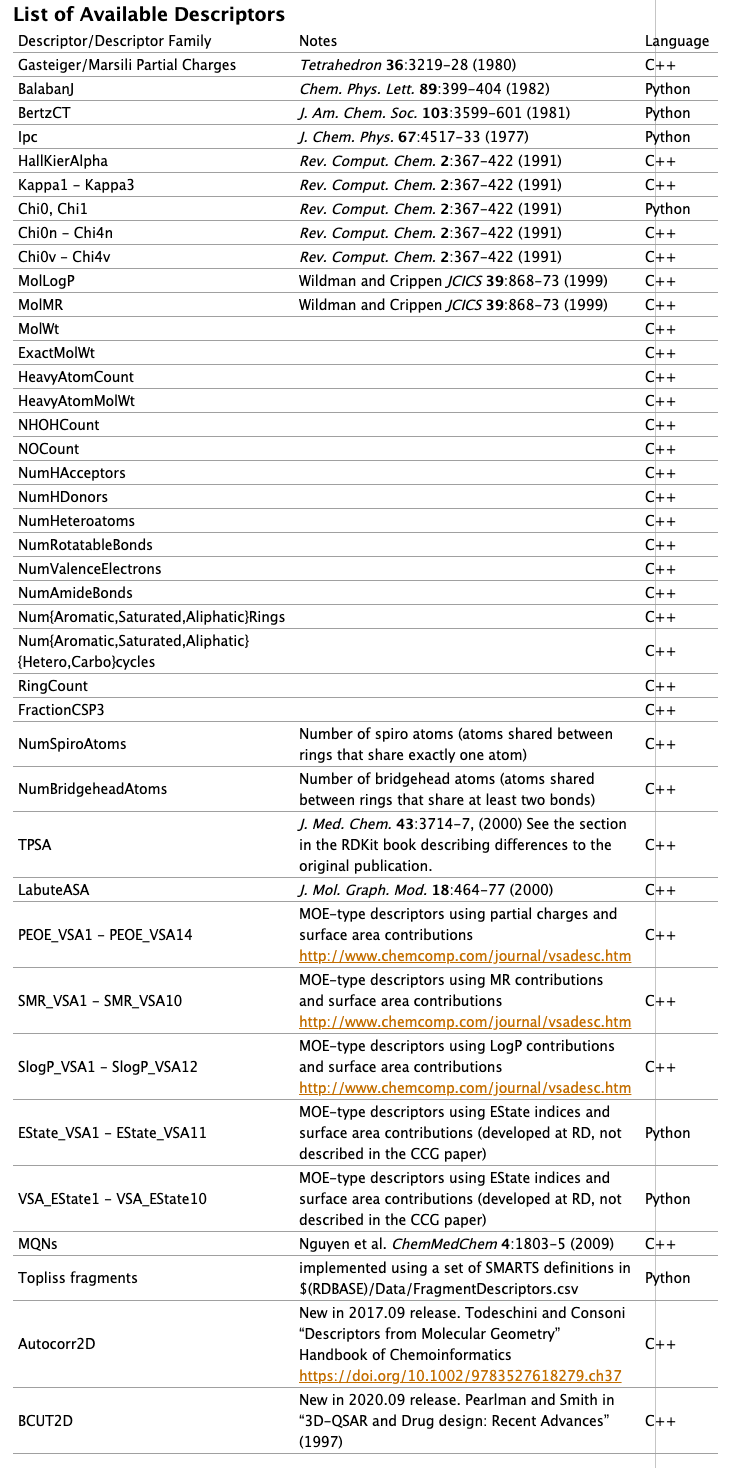

In [ ]:
import rdkit

In [ ]:
rdkit.Chem.Descriptors

<module 'rdkit.Chem.Descriptors' from '/root/miniconda/lib/python3.7/site-packages/rdkit/Chem/Descriptors.py'>

In [ ]:
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
from rdkit import Chem, DataStructs
from rdkit.Chem import MACCSkeys
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')

In [ ]:
Descriptors.TPSA(m)

37.3

In [ ]:
Descriptors.MolLogP(m)

1.3848

In [15]:
from inspect import getmembers, isfunction
from rdkit.Chem import Descriptors
desc_list = getmembers(Descriptors, isfunction)
print(len(desc_list))

406


In [2]:
descriptor_dict = {} 
for name, fnc in getmembers(Descriptors, isfunction) : 
  if 'AUTOCORR2D' in name : 
    pass
  elif  name == '_ChargeDescriptors' : 
    break
  else : 
    descriptor_dict[name] = fnc
    print(name)

BCUT2D_CHGHI
BCUT2D_CHGLO
BCUT2D_LOGPHI
BCUT2D_LOGPLOW
BCUT2D_MRHI
BCUT2D_MRLOW
BCUT2D_MWHI
BCUT2D_MWLOW
BalabanJ
BertzCT
Chi0
Chi0n
Chi0v
Chi1
Chi1n
Chi1v
Chi2n
Chi2v
Chi3n
Chi3v
Chi4n
Chi4v
EState_VSA1
EState_VSA10
EState_VSA11
EState_VSA2
EState_VSA3
EState_VSA4
EState_VSA5
EState_VSA6
EState_VSA7
EState_VSA8
EState_VSA9
ExactMolWt
FpDensityMorgan1
FpDensityMorgan2
FpDensityMorgan3
FractionCSP3
HallKierAlpha
HeavyAtomCount
HeavyAtomMolWt
Ipc
Kappa1
Kappa2
Kappa3
LabuteASA
MaxAbsEStateIndex
MaxAbsPartialCharge
MaxEStateIndex
MaxPartialCharge
MinAbsEStateIndex
MinAbsPartialCharge
MinEStateIndex
MinPartialCharge
MolLogP
MolMR
MolWt
NHOHCount
NOCount
NumAliphaticCarbocycles
NumAliphaticHeterocycles
NumAliphaticRings
NumAromaticCarbocycles
NumAromaticHeterocycles
NumAromaticRings
NumHAcceptors
NumHDonors
NumHeteroatoms
NumRadicalElectrons
NumRotatableBonds
NumSaturatedCarbocycles
NumSaturatedHeterocycles
NumSaturatedRings
NumValenceElectrons
PEOE_VSA1
PEOE_VSA10
PEOE_VSA11
PEOE_VSA12
PEO

In [3]:
len(descriptor_dict)

122

122개의 descriptor 존재

In [6]:
from rdkit import Chem
m = Chem.MolFromSmiles('C2NCC2CC1C(CCCC)C(OCCCC)C1c2ccccc2')

for name, descriptor in descriptor_dict.items(): 
    print('='*80)
    print(name)
    print('-'*80)
    print(descriptor(m))
    print()

BCUT2D_CHGHI
--------------------------------------------------------------------------------
2.5112602651495144

BCUT2D_CHGLO
--------------------------------------------------------------------------------
-2.539270868254684

BCUT2D_LOGPHI
--------------------------------------------------------------------------------
2.5375035207451413

BCUT2D_LOGPLOW
--------------------------------------------------------------------------------
-2.538861643966379

BCUT2D_MRHI
--------------------------------------------------------------------------------
5.264803230934195

BCUT2D_MRLOW
--------------------------------------------------------------------------------
-0.12020643012924662

BCUT2D_MWHI
--------------------------------------------------------------------------------
16.489034560652243

BCUT2D_MWLOW
--------------------------------------------------------------------------------
9.553878400000027

BalabanJ
------------------------------------------------------------------------------

# 3D Descriptors

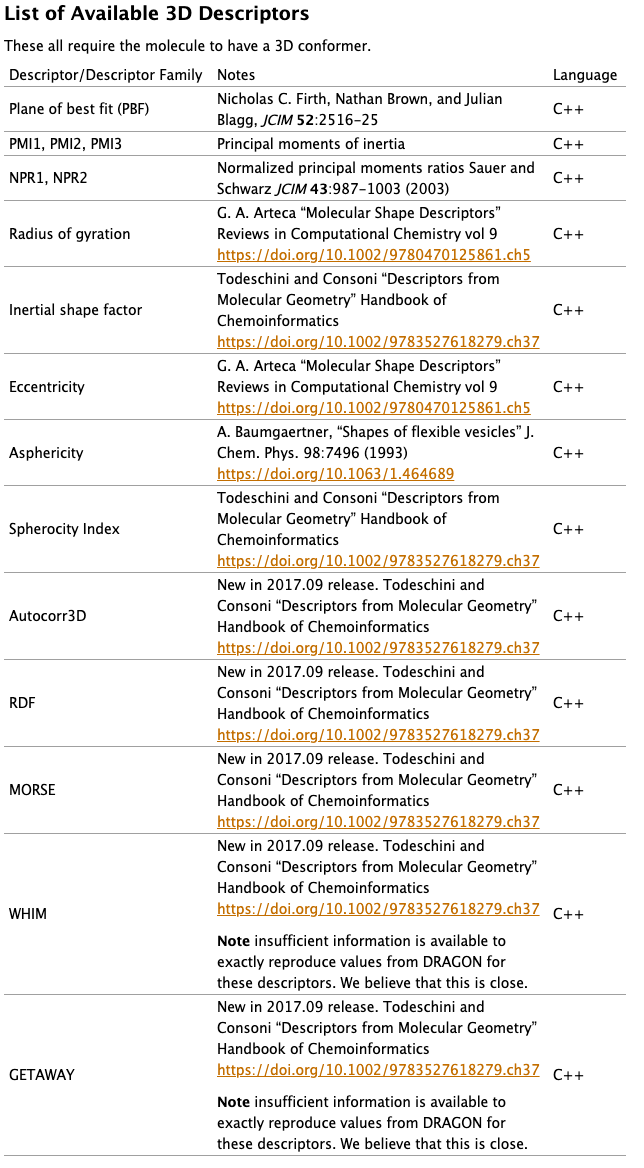

In [8]:
from inspect import getmembers, isfunction
from rdkit.Chem import Descriptors3D
print(getmembers(Descriptors3D, isfunction))

[('Asphericity', <function <lambda> at 0x00000238CF60CAF0>), ('Eccentricity', <function <lambda> at 0x00000238CF60CA60>), ('InertialShapeFactor', <function <lambda> at 0x00000238CF60C9D0>), ('NPR1', <function <lambda> at 0x00000238CF60C820>), ('NPR2', <function <lambda> at 0x00000238CF60C8B0>), ('PMI1', <function <lambda> at 0x00000238CF60C670>), ('PMI2', <function <lambda> at 0x00000238CF60C700>), ('PMI3', <function <lambda> at 0x00000238CF60C790>), ('RadiusOfGyration', <function <lambda> at 0x00000238CF60C940>), ('SpherocityIndex', <function <lambda> at 0x00000238CF60CB80>)]


In [9]:
Descriptors3D_dict={}
for name, fnc in getmembers(Descriptors3D, isfunction) :
  Descriptors3D_dict[name]= fnc

In [10]:
Descriptors3D_dict

{'Asphericity': <function rdkit.Chem.Descriptors3D.<lambda>(*x, **y)>,
 'Eccentricity': <function rdkit.Chem.Descriptors3D.<lambda>(*x, **y)>,
 'InertialShapeFactor': <function rdkit.Chem.Descriptors3D.<lambda>(*x, **y)>,
 'NPR1': <function rdkit.Chem.Descriptors3D.<lambda>(*x, **y)>,
 'NPR2': <function rdkit.Chem.Descriptors3D.<lambda>(*x, **y)>,
 'PMI1': <function rdkit.Chem.Descriptors3D.<lambda>(*x, **y)>,
 'PMI2': <function rdkit.Chem.Descriptors3D.<lambda>(*x, **y)>,
 'PMI3': <function rdkit.Chem.Descriptors3D.<lambda>(*x, **y)>,
 'RadiusOfGyration': <function rdkit.Chem.Descriptors3D.<lambda>(*x, **y)>,
 'SpherocityIndex': <function rdkit.Chem.Descriptors3D.<lambda>(*x, **y)>}

In [11]:
len(Descriptors3D_dict) #왜 10개밖에 안되지? 

10

rdkit 2020.9.1 버전일때

In [ ]:
from inspect import getmembers, isfunction
from rdkit.Chem import Descriptors3D
print(getmembers(Descriptors3D, isfunction))
Descriptors3D_dict={}
for i in getmembers(Descriptors3D, isfunction) :
  Descriptors3D_dict[i[0]]= i[1]

[('Asphericity', <function <lambda> at 0x7fe2d5080560>), ('Eccentricity', <function <lambda> at 0x7fe2d50804d0>), ('InertialShapeFactor', <function <lambda> at 0x7fe2d5080440>), ('NPR1', <function <lambda> at 0x7fe2d5080290>), ('NPR2', <function <lambda> at 0x7fe2d5080320>), ('PMI1', <function <lambda> at 0x7fe2d506d950>), ('PMI2', <function <lambda> at 0x7fe2d506d8c0>), ('PMI3', <function <lambda> at 0x7fe2d5080200>), ('RadiusOfGyration', <function <lambda> at 0x7fe2d50803b0>), ('SpherocityIndex', <function <lambda> at 0x7fe2d50805f0>)]


In [ ]:
Descriptors3D_dict

{'Asphericity': <function rdkit.Chem.Descriptors3D.<lambda>>,
 'Eccentricity': <function rdkit.Chem.Descriptors3D.<lambda>>,
 'InertialShapeFactor': <function rdkit.Chem.Descriptors3D.<lambda>>,
 'NPR1': <function rdkit.Chem.Descriptors3D.<lambda>>,
 'NPR2': <function rdkit.Chem.Descriptors3D.<lambda>>,
 'PMI1': <function rdkit.Chem.Descriptors3D.<lambda>>,
 'PMI2': <function rdkit.Chem.Descriptors3D.<lambda>>,
 'PMI3': <function rdkit.Chem.Descriptors3D.<lambda>>,
 'RadiusOfGyration': <function rdkit.Chem.Descriptors3D.<lambda>>,
 'SpherocityIndex': <function rdkit.Chem.Descriptors3D.<lambda>>}

In [ ]:
len(Descriptors3D_dict) #똑같이 10개군

10

In [ ]:
for i in Descriptors3D_dict : 
  print(Descriptors3D_dict[i](m))

RuntimeError: ignored

In [ ]:
for i in Descriptors3D_dict : 
  print(Descriptors3D_dict[i](m))

RuntimeError: ignored

In [ ]:
#rdkit에서 3d descriptor를 쓰려면 어떻게 해야하지?

#fingerfrints

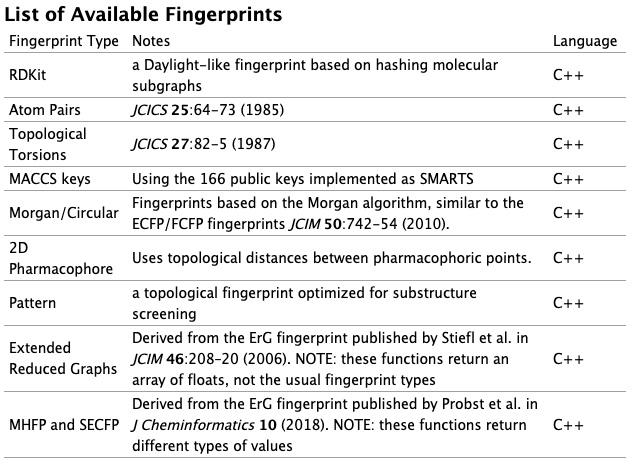

In [ ]:
from inspect import getmembers, isfunction #https://python.flowdas.com/library/inspect.html
from rdkit.Chem import Descriptors3D
print(getmembers(Descriptors3D, isfunction))
Descriptors3D_dict={}
for i in getmembers(Descriptors3D, isfunction) :
  Descriptors3D_dict[i[0]]= i[1]

In [ ]:
from rdkit import Chem
print(getmembers(Chem, isfunction))
Chem_dict={}
for i in getmembers(Chem, isfunction) :
  Chem_dict[i[0]]= i[1]

[('CanonSmiles', <function CanonSmiles at 0x7fe2d5328c20>), ('FindMolChiralCenters', <function FindMolChiralCenters at 0x7fe2d5328d40>), ('InchiToInchiKey', <function InchiToInchiKey at 0x7fe2d5328b00>), ('MolBlockToInchi', <function MolBlockToInchi at 0x7fe2d5328a70>), ('MolBlockToInchiAndAuxInfo', <function MolBlockToInchiAndAuxInfo at 0x7fe2d5328680>), ('MolFromInchi', <function MolFromInchi at 0x7fe2d8d16830>), ('MolToInchi', <function MolToInchi at 0x7fe2d53285f0>), ('MolToInchiAndAuxInfo', <function MolToInchiAndAuxInfo at 0x7fe2d8d16f80>), ('MolToInchiKey', <function MolToInchiKey at 0x7fe2d5328b90>), ('QuickSmartsMatch', <function QuickSmartsMatch at 0x7fe2d9a4a4d0>), ('SupplierFromFilename', <function SupplierFromFilename at 0x7fe2d5328cb0>), ('_test', <function _test at 0x7fe2d5328dd0>)]


In [ ]:
len(Chem_dict)

12

In [ ]:
for i in Chem_dict : 
  print(i)

CanonSmiles
FindMolChiralCenters
InchiToInchiKey
MolBlockToInchi
MolBlockToInchiAndAuxInfo
MolFromInchi
MolToInchi
MolToInchiAndAuxInfo
MolToInchiKey
QuickSmartsMatch
SupplierFromFilename
_test


In [ ]:
from rdkit.Chem import AllChem

fp = Chem.MACCSkeys.GenMACCSKeys(mol)
fp = Chem.AllChem.GetMorganFingerprintAsBitVect(mol, 2)
fp = Chem.RDKFingerprint(mol)
fp = Chem.rdmolops.LayeredFingerprint(mol)
fp = Chem.rdmolops.PatternFingerprint(mol)

In [ ]:
rdkit.__version__

'2020.09.1'

In [ ]:
import sys
import os
import requests
import subprocess
import shutil
from logging import getLogger, StreamHandler, INFO


logger = getLogger(__name__)
logger.addHandler(StreamHandler())
logger.setLevel(INFO)


def install(
        chunk_size=4096,
        file_name="Miniconda3-latest-Linux-x86_64.sh",
        url_base="https://repo.continuum.io/miniconda/",
        conda_path=os.path.expanduser(os.path.join("~", "miniconda")),
        rdkit_version='2020.09.1',
        add_python_path=True,
        force=False):
    """install rdkit from miniconda
    ```
    import rdkit_installer
    rdkit_installer.install()
    ```
    """

    python_path = os.path.join(
        conda_path,
        "lib",
        "python{0}.{1}".format(*sys.version_info),
        "site-packages",
    )

    if add_python_path and python_path not in sys.path:
        logger.info("add {} to PYTHONPATH".format(python_path))
        sys.path.append(python_path)

    if os.path.isdir(os.path.join(python_path, "rdkit")):
        logger.info("rdkit is already installed")
        if not force:
            return

        logger.info("force re-install")

    url = url_base + file_name
    python_version = "{0}.{1}.{2}".format(*sys.version_info)

    logger.info("python version: {}".format(python_version))

    if os.path.isdir(conda_path):
        logger.warning("remove current miniconda")
        shutil.rmtree(conda_path)
    elif os.path.isfile(conda_path):
        logger.warning("remove {}".format(conda_path))
        os.remove(conda_path)

    logger.info('fetching installer from {}'.format(url))
    res = requests.get(url, stream=True)
    res.raise_for_status()
    with open(file_name, 'wb') as f:
        for chunk in res.iter_content(chunk_size):
            f.write(chunk)
    logger.info('done')

    logger.info('installing miniconda to {}'.format(conda_path))
    subprocess.check_call(["bash", file_name, "-b", "-p", conda_path])
    logger.info('done')

    logger.info("installing rdkit")
    subprocess.check_call([
        os.path.join(conda_path, "bin", "conda"),
        "install",
        "--yes",
        "-c", "rdkit",
        "python==3.7.10",
        "rdkit" if rdkit_version is None else "rdkit=={}".format(rdkit_version)])
    logger.info("done")

    import rdkit
    logger.info("rdkit-{} installation finished!".format(rdkit.__version__))



install()

add /root/miniconda/lib/python3.7/site-packages to PYTHONPATH
python version: 3.7.10
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit
done
rdkit-2020.09.1 installation finished!
